# Overlay location

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import scipy.stats.distributions as dist
import uproot

higgs_name = {3: "H→ss", 4: "H→cc", 5: "H→bb", 13: "H→μμ", 15: "H→ττ",
    20: "H→Zγ", 21: "H→gluons", 22: "H→γγ", 23: "H→ZZ*", 24: "H→WW"}
number2decay = lambda number: higgs_name[number]

this_project = Path.home() / "ILD_vvH_DBD_vs_MC2020"  # This might be different depending on where you put the git repo.
data = this_project / "data"

kek_path = Path("home/ilc/kunath/vvH_DBD_vs_MC2020/data")
# If working on kek-cc, my rootfiles might still/already be available.
# if kek_path.exists(): data = Path("home/ilc/kunath/vvH_DBD_vs_MC2020/data")

fig_dir = this_project / "doc/fig"
# fig_dir = this_project / "compare" # To not overwrite the presentation figures while playing around.
fig_dir.mkdir(exist_ok=True)
dpi = 300
facecolor = "white"

In [2]:
new            = uproot.open(data / "new_with_overlay.root")["higgs"].pandas.df()
new_only_higgs = uproot.open(data / "new_only_higgs.root"  )["higgs"].pandas.df()
old            = uproot.open(data / "old_with_overlay.root")["higgs"].pandas.df()
old_only_higgs = uproot.open(data / "old_only_higgs.root"  )["higgs"].pandas.df()

In [3]:
# Overlay

new_overlay = (new - new_only_higgs)[[c for c in new.columns if c.startswith("n_")] + ["e_h"]]
old_overlay = (old - old_only_higgs)[[c for c in old.columns if c.startswith("n_")] + ["e_h"]]

new_overlay["energy"] = new_overlay["e_h"] 
new_overlay = new_overlay.drop(columns=["e_h", "n_isolated_leptons"])
old_overlay["energy"] = old_overlay["e_h"] 
old_overlay = old_overlay.drop(columns=["e_h", "n_isolated_leptons"])

pfo_types = dict(n_muons="#$\mu^\pm$", n_electrons="#$e^\pm$", n_gamma="#$\gamma~~$", 
                 n_charged_hadrons="#$h^\pm$", n_neutral_hadrons="#$h^0$")
assert all(new_overlay["n_pfos"] == sum(new_overlay[c] for c in pfo_types))
assert all(old_overlay["n_pfos"] == sum(old_overlay[c] for c in pfo_types))

overlay_pairs = [
    (old_overlay, new_overlay),
    (old_overlay[old_overlay.n_pfos > 0], new_overlay[new_overlay.n_pfos > 0]),
]

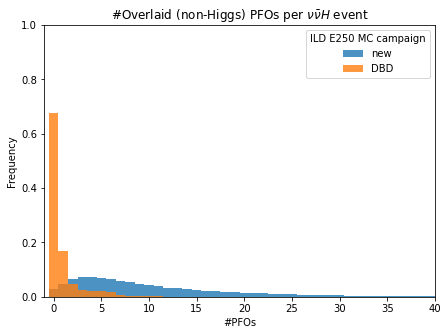

In [4]:
# Part 1: Only the "full" event.
fig_full_pfo, ax = plt.subplots(figsize=(7, 5))
bins = np.arange(-.5, 140, 1)#
kw = dict(ax=ax, density=True, bins=bins, alpha=.8)
new_overlay.n_pfos.plot.hist(label="new", color="C0", **kw)
old_overlay.n_pfos.plot.hist(label="DBD", color="C1", **kw)
ax.set_xlim((-1, 40))
ax.set_ylim((None, 1))
ax.set_xlabel("#PFOs")
ax.set_ylabel("Frequency")
ax.set_title("#Overlaid (non-Higgs) PFOs per $\\nu\\bar{\\nu}H$ event")
ax.legend(title="ILD E250 MC campaign")
fig_full_pfo.savefig("overlay_pfos.png",
    dpi=dpi, facecolor=facecolor)

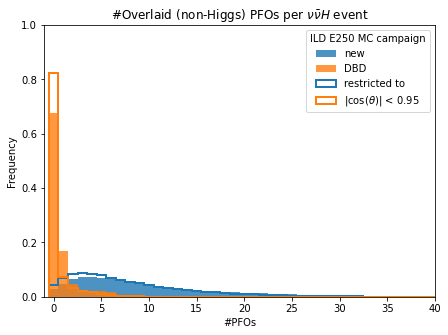

In [5]:
# Part 2: Remove the overlay.
kw["histtype"] = "step"
kw["alpha"] = 1
kw["linewidth"] = 2
new_overlay.n_pfos_not_forward.plot.hist(label="restricted to", color="C0", **kw)
old_overlay.n_pfos_not_forward.plot.hist(label="|$\cos(\\theta)$| < 0.95", color="C1", **kw)
ax.legend(title="ILD E250 MC campaign")
fig_full_pfo

fig_full_pfo.savefig("overlay_pfos_not_forward.png",
    dpi=dpi, facecolor=facecolor)
fig_full_pfo

## Overlay $\cos(\theta)$ vs p$_T$

TBD